In [28]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.75
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\swaro\Anaconda3\envs\gpu\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [29]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
IMAGE_SIZE = [224, 224]

train_path = 'Data/train'
valid_path = 'Data/val'

In [31]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [32]:
for layer in inception.layers:
    layer.trainable = False

In [33]:
folders = glob('Data/train/*')

In [34]:
x = Flatten()(inception.output)

In [35]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [36]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
                rescale=1./255,rotation_range=40,                ##rotation randomly between 40 and -40
     width_shift_range=0.2,
    height_shift_range=0.2,                           ##20% of total height and width will change randomly from 0 to 20%
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale = 1./255)


In [39]:
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1398 images belonging to 2 classes.


In [40]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 384 images belonging to 2 classes.


In [41]:
len(test_set)

12

In [42]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 44 steps, validate for 12 steps
Epoch 1/30
44/44 [==============================] - 26s 595ms/step - loss: 1.1755 - accuracy: 0.7361 - val_loss: 4.2241 - val_accuracy: 0.6120
Epoch 2/30
44/44 [==============================] - 22s 506ms/step - loss: 1.2842 - accuracy: 0.7661 - val_loss: 10.6824 - val_accuracy: 0.5078
Epoch 3/30
44/44 [==============================] - 24s 545ms/step - loss: 0.9998 - accuracy: 0.8305 - val_loss: 2.4837 - val_accuracy: 0.7266
Epoch 4/30
44/44 [==============================] - 27s 622ms/step - loss: 0.8158 - accuracy: 0.8383 - val_loss: 2.5722 - val_accuracy: 0.7370
Epoch 5/30
44/44 [==============================] - 28s 627ms/step - loss: 0.7848 - accuracy: 0.8498 - val_loss: 2.9817 - val_accuracy: 0.6875
Epoch 6/30
44/44 [==============================] - 29s 663ms/step - loss: 0.8199 - accuracy: 0.8476 - val_loss: 3.6654 - val_accuracy: 0.7240
Epoch 7/30
44/44 [==============================]

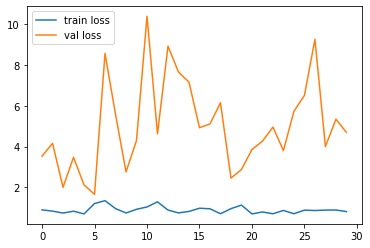

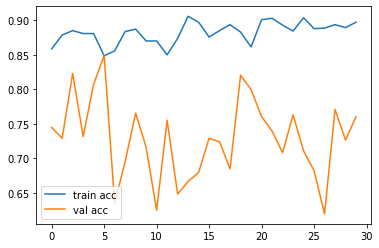

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
#save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')